In [21]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
plt.style.use('seaborn-v0_8')
sns.set(font_scale=1.1)
pd.set_option('display.max_columns', None)


In [22]:
#load dataset
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

#displaying first 5 columns
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
# Shape of the dataset (rows, columns)
print("Dataset shape:", df.shape)

# Column names and data types
df.info()

Dataset shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

In [24]:
#summary stats for numeric and object columns
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#count of missing values per column
df.isnull().sum();

In [26]:
#seperate by data type
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric Columns", num_cols)
print("Categorial columns", cat_cols)

Numeric Columns ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Categorial columns ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [27]:
# print(df['TotalCharges'].dtype)
# df[pd.to_numeric(df['TotalCharges'], errors = 'coerce').isna()]

# Convert to numeric, force errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

# Drop rows where TotalCharges is now NaN
df.dropna(subset=['TotalCharges'], inplace=True)

# Reset index after dropping
df.reset_index(drop=True, inplace=True)

In [28]:
df.drop('customerID', axis=1, inplace=True)

In [29]:
# Get unique values of each categorical column
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

binary_map = {
    'Partner': {'Yes': 1, 'No': 0},
    'Dependents': {'Yes': 1, 'No': 0},
    'PhoneService': {'Yes': 1, 'No': 0},
    'PaperlessBilling': {'Yes': 1, 'No': 0},
    'Churn': {'Yes': 1, 'No': 0},
    'gender': {'Male': 1, 'Female': 0}
}

df.replace(binary_map, inplace=True)

cols_with_service_issues = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in cols_with_service_issues:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

multi_cat_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]

df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)


gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


C:\Users\HELLO\AppData\Local\Temp\ipykernel_29204\1572724063.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(binary_map, inplace=True)


In [12]:
# Final check
print("Final dataset shape:", df.shape)
print("All numeric:", df.dtypes.value_counts())
df.head()


Final dataset shape: (7032, 24)
All numeric: bool       14
int64       8
float64     2
Name: count, dtype: int64


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,False,False,False,False,True,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,False,False,False,True,False,True,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,False,False,False,True,True,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,False,False,False,True,False,True,True,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,False,True,False,False,False,False,False,False,False,False,False,False,True,False


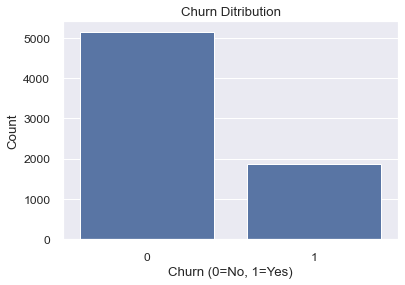

Overall chuen rate: 26.58%


In [13]:
sns.countplot(data = df, x = 'Churn')
plt.title("Churn Ditribution")
plt.xlabel("Churn (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

churn_rate = df['Churn'].mean()
print(f"Overall chuen rate: {churn_rate:.2%}")

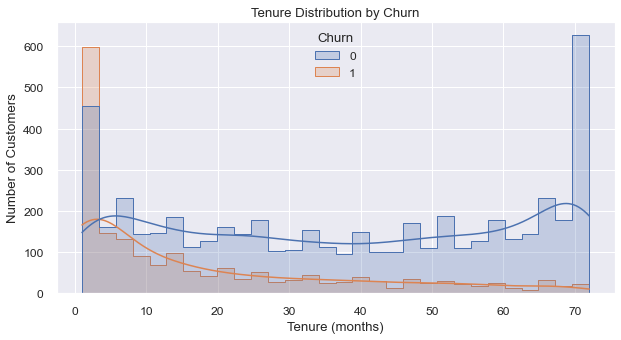

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True, element='step')
plt.title("Tenure Distribution by Churn")
plt.xlabel("Tenure (months)")
plt.ylabel("Number of Customers")
plt.show()


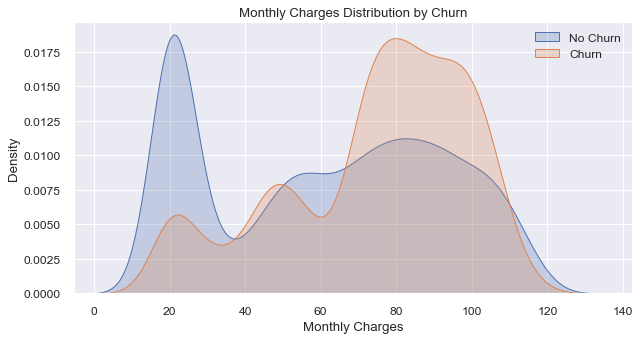

In [15]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df[df['Churn'] == 0]['MonthlyCharges'], label='No Churn', fill=True)
sns.kdeplot(df[df['Churn'] == 1]['MonthlyCharges'], label='Churn', fill=True)
plt.title("Monthly Charges Distribution by Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.legend()
plt.show()


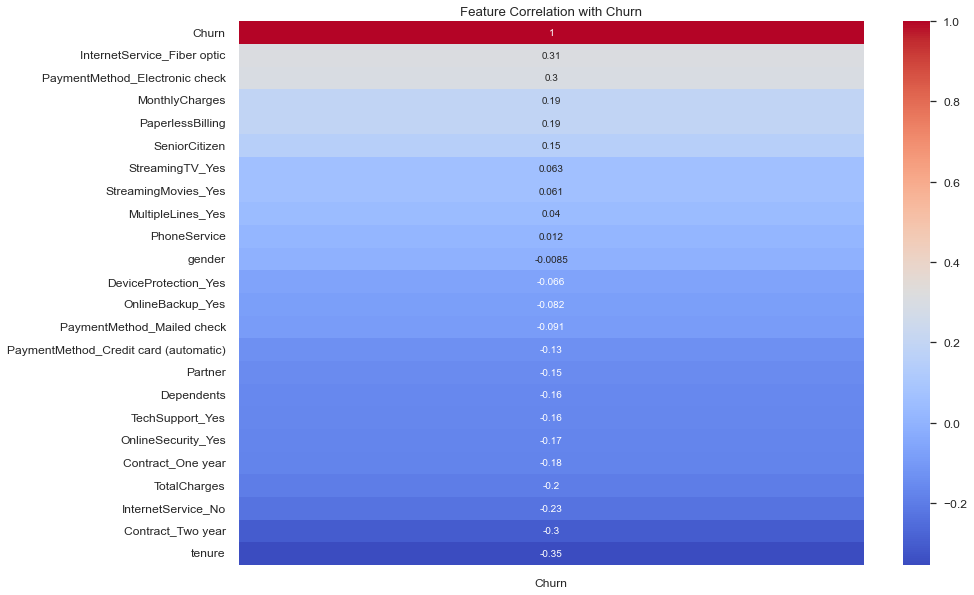

In [16]:
# Compute correlation matrix
corr = df.corr()

# Plot heatmap of top correlated features with churn
plt.figure(figsize=(14, 10))
sns.heatmap(corr[['Churn']].sort_values(by='Churn', ascending=False), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Churn")
plt.show()


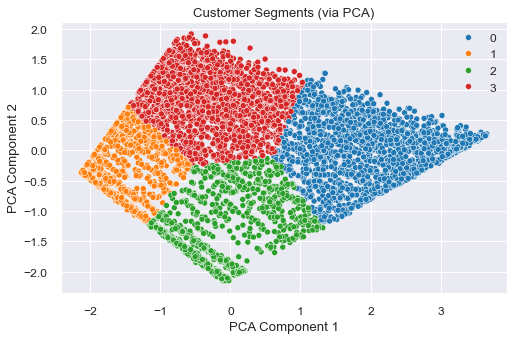

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Select features
clustering_features = df[['tenure', 'MonthlyCharges', 'TotalCharges']].copy()

# Step 2: Standardize
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

# Step 3: Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Step 4: Add cluster labels to original df
df['Cluster'] = clusters

# Step 5: Optional PCA plot
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=clusters, palette='tab10')
plt.title("Customer Segments (via PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X = df.drop('Churn', axis=1)    # drop non-predictive and target column
y = df['Churn']  # target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coeff_df.head(10))


Accuracy: 0.8017057569296375

Confusion Matrix:
 [[918 115]
 [164 210]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.73      1407
weighted avg       0.79      0.80      0.80      1407

                                  Feature  Coefficient
10            InternetService_Fiber optic     1.106018
21         PaymentMethod_Electronic check     0.373794
9                       MultipleLines_Yes     0.354131
16                        StreamingTV_Yes     0.343169
17                    StreamingMovies_Yes     0.319880
6                        PaperlessBilling     0.292958
1                           SeniorCitizen     0.193471
14                   DeviceProtection_Yes     0.064259
22             PaymentMethod_Mailed check     0.056416
20  PaymentMethod_Credit c

Decision Tree Accuracy: 0.7057569296375267

Confusion Matrix:
 [[700 333]
 [ 81 293]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.68      0.77      1033
           1       0.47      0.78      0.59       374

    accuracy                           0.71      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.78      0.71      0.72      1407

Random Forest Accuracy: 0.7882018479033405

Confusion Matrix:
 [[929 104]
 [194 180]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



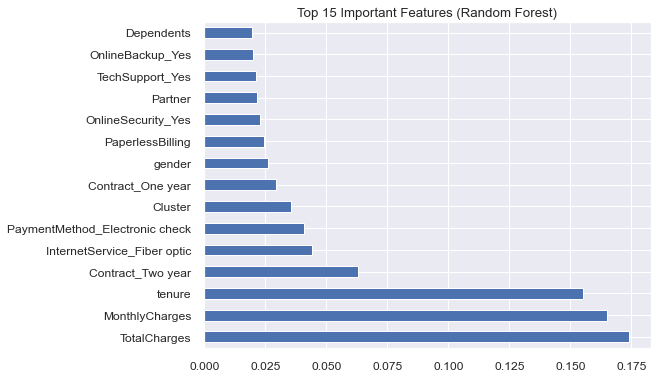

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df.drop('Churn', axis=1)
y = df['Churn']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

dt_model = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, dt_preds))
print("\nClassification Report:\n", classification_report(y_test, dt_preds))

rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("\nClassification Report:\n", classification_report(y_test, rf_preds))

feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh', figsize=(8, 6))
plt.title("Top 15 Important Features (Random Forest)")
plt.show()


Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Random Forest ROC AUC: 0.836573554001377


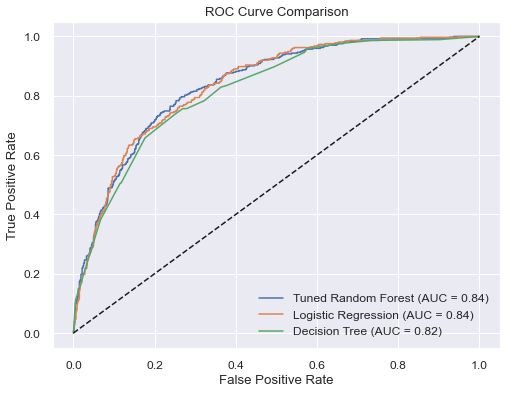

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid,
                    scoring='roc_auc', cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_rf = grid.best_estimator_

y_probs = best_rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print("Tuned Random Forest ROC AUC:", roc_auc)

def plot_roc(model, X_test, y_test, label):
    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc:.2f})")

plt.figure(figsize=(8,6))
plot_roc(best_rf, X_test, y_test, "Tuned Random Forest")
plot_roc(model, X_test, y_test, "Logistic Regression")
plot_roc(dt_model, X_test, y_test, "Decision Tree")

plt.plot([0,1], [0,1], 'k--')  # baseline
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


In [39]:
import joblib

joblib.dump(best_rf, 'churn_random_forest_model.pkl')


['churn_random_forest_model.pkl']

In [40]:
model = joblib.load('churn_random_forest_model.pkl')

In [41]:
# Predict for one row from test set
sample = X_test.iloc[0:1]
prediction = model.predict(sample)

print("Churn Prediction:", "Yes" if prediction[0] == 1 else "No")


Churn Prediction: No


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
